# Getting Started

The `tket` compiler is a powerful tool for optimizing and manipulating platform-agnostic quantum circuits, focused on enabling superior performance on NISQ devices. The `pytket` package provides an API for interacting with `tket` and transpiling to and from other popular quantum circuit specifications.

Compatible with 64-bit Python 3.9, 3.10 and 3.11


### Install

In [ ]:
!pip install pytket

This will install the pytket package and all its dependencies. If you are using a Jupyter notebook, you will need to restart the kernel before you can import the package.
There are seperate packages for managing the interoperability between `pytket` and other packages.

### Extension Module


The `pytket` extensions are separate python modules which allows `pytket` to interface with backends form a range of providers including quantum devices from **Quantinuum** and **IBM**. In `pytket` a `Backend` represents a connection to a QPU or simulator for processing quantum circuits. Additionally the extensions allow `pytket` to cross-compile circuits from different quantum computing libraries like **qiskit, cirq** and **pennylane**

This is how you can install additional modules

In [ ]:
!pip install pytket-quantinuum
!pip install pytket-qiskit

### Types of Backends

The types of `Backend` available in `pytket` are the following.


1. **QPU** : These are the real quantum computers that return the shot-based results. 
2. **Cloud Access** : Cloud backends allow pytket to interface with cloud platforms to access traditional QPUs and simulators.
3. **Emulators** : These classically simulate a circuit and produce a shot-based results. Sometimes emulators have the noise model and hace connectivity constraint to emulate the real QPUs.
4. **Statevector Simulator** : Calculates the pure quantum state prepared by a circuit returning a vector. Eg `ForestStateBackend`
5. **Unitary Simulators** : Calculates the Unitary operator that is applied by the circuit. A matrix is returned.
6. **Density Matrix Simulators** : Computes the density matrix prepared by the circuit.

There are others too like the `SimplexBackend` which simulates the Clifford circuit.

### Backends Available:

#### QPU's

1. IBM Q   : Remote IBM devices
2. ION Q   : Remote IONQ devices
3. Forest Backend : Remote Rigetti Devices
4. AQT backend :  Remote Alpine Quantum Technologies Devices 
5. Quantinuum Backend : There are currently two devices, H1-1 and H1-2
6. IQM Backend : Interface to IQM devices.

### Cloud Access

1. Azure Backend : Microsoft
2. Braket Backend : Amazon

### Emulators

1. IBMQEmulator Backend : Aer backend from IBM
2. Quantinuum Backend : Only two emulators H1-1E and H1-2E

### Statevector Simulators

1. Cirq State Sample Backend : Google Cirq for sampling
2. Cirq State Sim Backend : Statevector Simulator State return
3. Aer State Backend : From qiskit
4. Forest State Backend : State based backend from Rigetti
5. Project Q backend

![Screenshot 2023-10-26 at 12-50-43 Extension Modules — pytket-extensions documentation.png](<attachment:Screenshot 2023-10-26 at 12-50-43 Extension Modules — pytket-extensions documentation.png>)
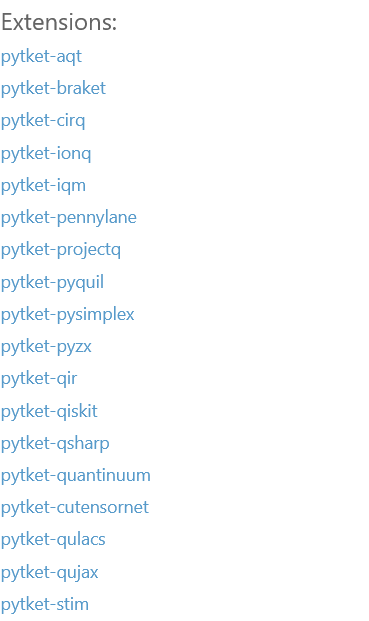

### Making a Circuit

In [4]:
from pytket import Circuit

c = Circuit(2, 2) # defoult 2 qubits and 2 classical bits
c.H(0)            # Hadamard gate on qubit 0
c.Rz(0.5, 0)      # Rotation by 0.5 * pi around Z on qubit 0
c.CX(0, 1)        # CNOT from qubit 0 to qubit 1
c.measure_all()   # Measurement on all qubits, storing the result in the classical bit with the same index

[H q[0]; Rz(0.5) q[0]; CX q[0], q[1]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; ]

Pytket's flexible interface allows you to take circuits defined in fidderent language or even in a QASM file and make it to tket format.

In [ ]:
from pytket.qasm import circuit_to_qasm
c =circuit_from_qasm("enter the name if the file.qasm")

or directly convert a Qiskti circuit

In [7]:
from qiskit import QuantumCircuit
from pytket.extensions.qiskit import qiskit_to_tk

qc = QuantumCircuit(2, 2)
qc.h(0) # Hadamard gate on qubit 0
qc.cx(0, 1) # CNOT from qubit 0 to qubit 1

c = qiskit_to_tk(qc)

In [8]:
c

[H q[0]; CX q[0], q[1]; ]

There are generic backends in the `Backend` interface. This represent the connection to a quantum device or simulator. It is possible to run circuits on platforms from different providers as well.

In [9]:
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend

# make the circuit
circ = Circuit(3)
circ.H(0).CX(0, 1).CX(1, 2).CX(0, 1).H(0)  # GHZ state

# initialize the backend
backend = AerBackend()
result = backend.run_circuit(circ, n_shots=1000)
print(result.get_counts())

Counter({(): 1000})


This print outs a summary of readouts (the final values of the classical bits) and their frequencies.

Each `pytket` backend comes with its own default compilation method. This is a recommended sequence of optimization passes to meet the requirements of the specific `Backend`

Let's see how to run the IBM device!

First set up your IBM account

In [12]:
# Replace the placeholders with your actual values
ibm_token = 'Enter Token'
hub = 'ibm-q'
group = 'default'
project = 'projects'

In [16]:
from pytket.extensions.qiskit import set_ibmq_config
set_ibmq_config(ibmq_api_token=ibm_token)

Or do the following:

In [17]:
# or use the following

from pytket.extensions.qiskit import set_ibmq_config

set_ibmq_config(ibmq_api_token=ibm_token, instance=f"{hub}/{group}/{project}")

Alternatively, you can use the following qiskit commands to save your credentials locally

In [ ]:

# from qiskit_ibm_provider import IBMProvider
# from qiskit_ibm_runtime import QiskitRuntimeService

# IBMProvider.save_account(token=ibm_token)
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_token)

In [28]:
from pytket.extensions.qiskit import IBMQBackend

circ = Circuit(3).X(0).CCX(0, 1, 2)
guadalupe_device = IBMQBackend('ibmq_guadalupe')

# Compile Circuit to use supported gates of IBMQ Belem
compiled_circ = guadalupe_device.get_compiled_circuit(circ)
result = backend.run_circuit(compiled_circ, n_shots=100)

In [30]:
print(result.get_counts())

Counter({(): 100})
